# Classification Exercise

We'll be working with some California Census Data, we'll be trying to use various features of an individual to predict what class of income they belogn in (>50k or <=50k). 

Here is some information about the data:

<table>
<thead>
<tr>
<th>Column Name</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>age</td>
<td>Continuous</td>
<td>The age of the individual</td>
</tr>
<tr>
<td>workclass</td>
<td>Categorical</td>
<td>The type of employer the  individual has (government,  military, private, etc.).</td>
</tr>
<tr>
<td>fnlwgt</td>
<td>Continuous</td>
<td>The number of people the census  takers believe that observation  represents (sample weight). This  variable will not be used.</td>
</tr>
<tr>
<td>education</td>
<td>Categorical</td>
<td>The highest level of education  achieved for that individual.</td>
</tr>
<tr>
<td>education_num</td>
<td>Continuous</td>
<td>The highest level of education in  numerical form.</td>
</tr>
<tr>
<td>marital_status</td>
<td>Categorical</td>
<td>Marital status of the individual.</td>
</tr>
<tr>
<td>occupation</td>
<td>Categorical</td>
<td>The occupation of the individual.</td>
</tr>
<tr>
<td>relationship</td>
<td>Categorical</td>
<td>Wife, Own-child, Husband,  Not-in-family, Other-relative,  Unmarried.</td>
</tr>
<tr>
<td>race</td>
<td>Categorical</td>
<td>White, Asian-Pac-Islander,  Amer-Indian-Eskimo, Other, Black.</td>
</tr>
<tr>
<td>gender</td>
<td>Categorical</td>
<td>Female, Male.</td>
</tr>
<tr>
<td>capital_gain</td>
<td>Continuous</td>
<td>Capital gains recorded.</td>
</tr>
<tr>
<td>capital_loss</td>
<td>Continuous</td>
<td>Capital Losses recorded.</td>
</tr>
<tr>
<td>hours_per_week</td>
<td>Continuous</td>
<td>Hours worked per week.</td>
</tr>
<tr>
<td>native_country</td>
<td>Categorical</td>
<td>Country of origin of the  individual.</td>
</tr>
<tr>
<td>income</td>
<td>Categorical</td>
<td>"&gt;50K" or "&lt;=50K", meaning  whether the person makes more  than \$50,000 annually.</td>
</tr>
</tbody>
</table>

In [13]:
import os
import shutil
os.getcwd()

'/Users/Gretel_MacAir/Documents/ML/6_TensorFlow/Tensorflow-Bootcamp-master/MyNotebooks/UdemyTensorflowCourse'

## 1. Loading the libraries and dataset

### THE LIBRARIES

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

### THE DATA

In [15]:
census = pd.read_csv('census_data.csv')

In [16]:
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Getting to know the data

In [17]:
# See other notebook

## 3. Prepping the data

### LABEL PREP

In [18]:
census['label'] = census['income_bracket'].apply(lambda x: 1 if x ==' >50K' else 0)

In [19]:
y_val = census['label']

### FEATURE COLUMN IDENTIFICATION

In [20]:
census.dtypes

age                int64
workclass         object
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket    object
label              int64
dtype: object

In [21]:
cat_cols = census.select_dtypes('object').columns
num_cols = census.select_dtypes('int64').columns

In [22]:
cat_cols_list = list(cat_cols)
cat_cols_list.remove('income_bracket')
cat_cols_list

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country']

In [23]:
num_cols_list = list(num_cols)
num_cols_list.remove('label')
num_cols_list

['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [24]:
x_data_cols = []
for f in cat_cols_list:
    x_data_cols.append(f)
for f in num_cols_list:
    x_data_cols.append(f)

In [25]:
x_data = census[x_data_cols]

### TRAINING TEST SPLIT

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_data,
                                                    y_val,
                                                    test_size=0.3, 
                                                    random_state=101)

### FEATURE ENGINEERING

** Catergorical Features **

In [27]:
cat_cols_list

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country']

In [28]:
cat_feat_list = []
cat_feat_dict = {}

In [29]:
for cat_col in cat_cols_list:
    voc_list = census[cat_col].value_counts().keys()
    cat_feat_dict[cat_col] = voc_list
    len_voc_list = len(voc_list)
    name = str(cat_col) + '_hash' 
    name = tf.feature_column.categorical_column_with_vocabulary_list(cat_col, voc_list)
    cat_feat_list.append(name)

** Continuous Features**

In [30]:
num_feat_list = []
for nf in num_cols_list:
    name = str(nf) + '_f'
    name = tf.feature_column.numeric_column(nf)
    num_feat_list.append(name)

** All Features **

In [31]:
feat_cols = cat_feat_list + num_feat_list

## 4. Building the model

In [32]:
batch_size = 64
num_epochs = 100
steps = len(X_train)/batch_size*num_epochs
log_step_count_steps = steps/10

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train,
                                                 batch_size=batch_size,
                                                 num_epochs=num_epochs,
                                                 shuffle=True)

In [33]:
tf.logging.set_verbosity(tf.logging.INFO)
tf.estimator.RunConfig.log_step_count_steps = log_step_count_steps

In [34]:
model_dir = 'tf_LinearClassifier_model'
try:
    shutil.rmtree(model_dir )
except:
    pass
os.mkdir(model_dir)

In [35]:
tf_LinearClassifier_model = tf.estimator.LinearClassifier(feature_columns=feat_cols,
                                                          n_classes=2,
                                                          model_dir=model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_LinearClassifier_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11bf0b588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## 5. Train the model

In [36]:
tf.logging.set_verbosity(tf.logging.INFO)
tf.estimator.RunConfig.log_step_count_steps = log_step_count_steps

In [37]:
tf_LinearClassifier_model.train(input_fn=input_func,steps=steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into tf_LinearClassifier_model/model.ckpt.
INFO:tensorflow:loss = 44.3614, step = 1
INFO:tensorflow:global_step/sec: 272.725
INFO:tensorflow:loss = 32.6025, step = 3563 (13.063 sec)
INFO:tensorflow:global_step/sec: 323.582
INFO:tensorflow:loss = 27.0083, step = 7125 (11.006 sec)
INFO:tensorflow:global_step/sec: 391.462
INFO:tensorflow:loss = 40.3627, step = 10687 (9.099 sec)
INFO:tensorflow:global_step/sec: 398.603
INFO:tensorflow:loss = 25.478, step = 14249 (8.938 sec)
INFO:tensorflow:global_step/sec: 352.743
INFO:tensorflow:loss = 17.1639, step = 17811 (10.096 sec)
INFO:tensorflow:global_step/sec: 388.845
INFO:tensorflow:loss = 19.1772, step = 21373 (9.162 sec)
INFO:tensorflow:global_step/sec: 356.592
INFO:tens

## 6. Evaluating the model

### EVALUATING TRAINING

** Evaluate **

In [38]:
training_eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                               y=y_train,
                                                               batch_size=10,
                                                               num_epochs=1,
                                                               shuffle=False)

In [39]:
training_results = tf_LinearClassifier_model.evaluate(training_eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-13-16:19:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_LinearClassifier_model/model.ckpt-35613
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-13-16:20:00
INFO:tensorflow:Saving dict for global step 35613: accuracy = 0.839066, accuracy_baseline = 0.758336, auc = 0.892602, auc_precision_recall = 0.736593, average_loss = 0.35116, global_step = 35613, label/mean = 0.241664, loss = 3.51037, precision = 0.734574, prediction/mean = 0.214247, recall = 0.523057


** Predict **

In [40]:
training_predictions = tf_LinearClassifier_model.predict(training_eval_input_func)
final_training_preds = [pred['class_ids'][0] 
                        for pred 
                        in training_predictions]
training_predictions = tf_LinearClassifier_model.predict(training_eval_input_func)
final_training_probs = [pred['probabilities'][0:2] 
                        for pred 
                        in training_predictions]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_LinearClassifier_model/model.ckpt-35613
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_LinearClassifier_model/model.ckpt-35613
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Report **

In [41]:
print(classification_report(y_train, final_training_preds))

             precision    recall  f1-score   support

          0       0.86      0.94      0.90     17284
          1       0.73      0.52      0.61      5508

avg / total       0.83      0.84      0.83     22792



In [42]:
print(confusion_matrix(y_train, final_training_preds))

[[16243  1041]
 [ 2627  2881]]


** Errors **

In [43]:
X_train_eval = X_train
X_train_eval = X_train_eval.assign(label=y_train.values)
X_train_eval = X_train_eval.assign(prediction_TFLC=pd.Series(final_training_preds).values)
X_train_eval[((X_train_eval['label'] == 0) & (X_train_eval['prediction_TFLC'] == 1) |
             ((X_train_eval['label'] == 1)  & (X_train_eval['prediction_TFLC'] == 0)))]

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,age,education_num,capital_gain,capital_loss,hours_per_week,label,prediction_TFLC
26876,State-gov,Bachelors,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,32,13,0,0,40,1,0
16102,Private,Some-college,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,39,10,0,0,50,1,0
32536,Private,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Female,United-States,34,13,0,0,55,1,0
23672,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,41,13,0,1887,40,1,0
5624,Private,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,Amer-Indian-Eskimo,Female,United-States,21,12,0,0,46,1,0
24063,Private,10th,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States,61,6,0,0,50,1,0
12819,Private,Masters,Divorced,Exec-managerial,Not-in-family,White,Female,United-States,46,14,0,0,50,1,0
4172,Private,Masters,Married-civ-spouse,Tech-support,Husband,White,Male,?,46,14,0,1902,40,1,0
27316,State-gov,HS-grad,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,30,9,0,0,40,1,0
22780,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,26,9,0,0,40,1,0


### Evaluation Test

** Evaluate **

In [44]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False)

In [45]:
test_results = tf_LinearClassifier_model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-13-16:20:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_LinearClassifier_model/model.ckpt-35613
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-13-16:20:20
INFO:tensorflow:Saving dict for global step 35613: accuracy = 0.841335, accuracy_baseline = 0.761183, auc = 0.891033, auc_precision_recall = 0.743103, average_loss = 0.348821, global_step = 35613, label/mean = 0.238817, loss = 3.48785, precision = 0.732897, prediction/mean = 0.213656, recall = 0.528075


** Predict **

In [46]:
test_predictions = tf_LinearClassifier_model.predict(test_input_func)

In [47]:
final_test_preds = [pred['class_ids'][0] 
                    for pred 
                    in test_predictions]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_LinearClassifier_model/model.ckpt-35613
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


** Report **

In [48]:
print(classification_report(y_test, final_test_preds))

             precision    recall  f1-score   support

          0       0.86      0.94      0.90      7436
          1       0.73      0.53      0.61      2333

avg / total       0.83      0.84      0.83      9769



In [49]:
print(confusion_matrix(y_test, final_test_preds))

[[6987  449]
 [1101 1232]]


** Errors **

In [50]:
X_test_eval = X_test
X_test_eval = X_test_eval.assign(label=y_test.values)
X_test_eval = X_test_eval.assign(prediction_TFLC=pd.Series(final_test_preds).values)
X_test_eval[((X_test_eval['label'] == 0) & (X_test_eval['prediction_TFLC'] == 1) |
            ((X_test_eval['label'] == 1)  & (X_test_eval['prediction_TFLC'] == 0)))]

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,age,education_num,capital_gain,capital_loss,hours_per_week,label,prediction_TFLC
30539,Private,Doctorate,Divorced,Prof-specialty,Unmarried,Black,Female,United-States,45,16,0,3004,35,1,0
12462,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,44,13,0,0,60,0,1
9378,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,53,10,0,1977,40,1,0
3014,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States,28,9,0,0,40,1,0
22539,Private,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,United-States,31,9,2829,0,40,0,1
24916,Private,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,44,11,0,0,40,0,1
1981,Federal-gov,HS-grad,Married-civ-spouse,Adm-clerical,Husband,White,Male,United-States,49,9,0,0,40,1,0
31035,Private,Some-college,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,United-States,28,10,5013,0,55,0,1
16062,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,27,10,0,0,50,1,0
12937,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States,44,13,0,1977,50,1,0


## 7. Visualizing feature weights

In [51]:
wt_names = tf_LinearClassifier_model.get_variable_names()

In [52]:
wt_vals = [tf_LinearClassifier_model.get_variable_value(name) for name in wt_names]

In [53]:
cat_feat_dict.keys()

dict_keys(['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country'])

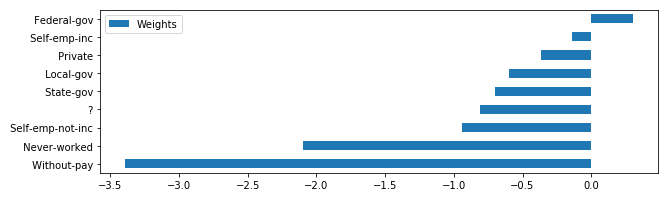

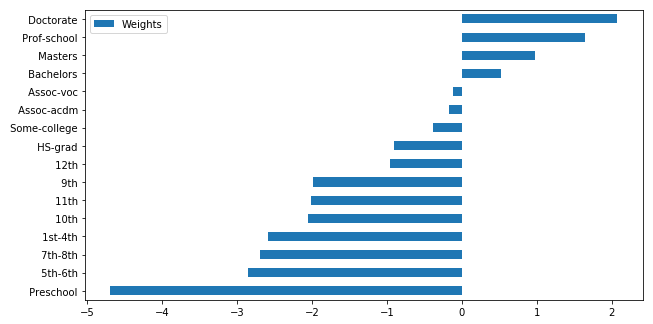

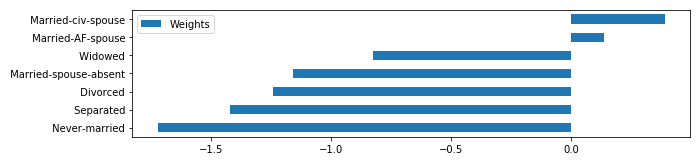

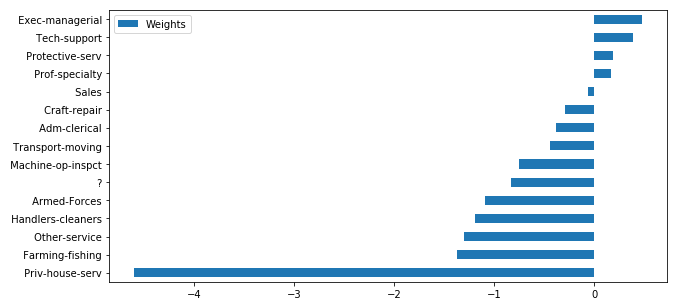

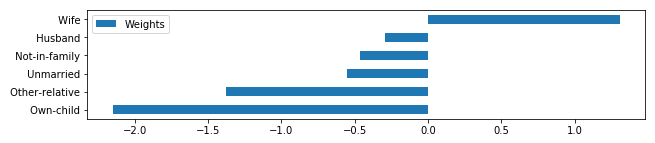

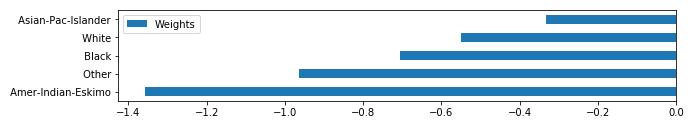

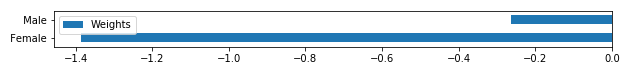

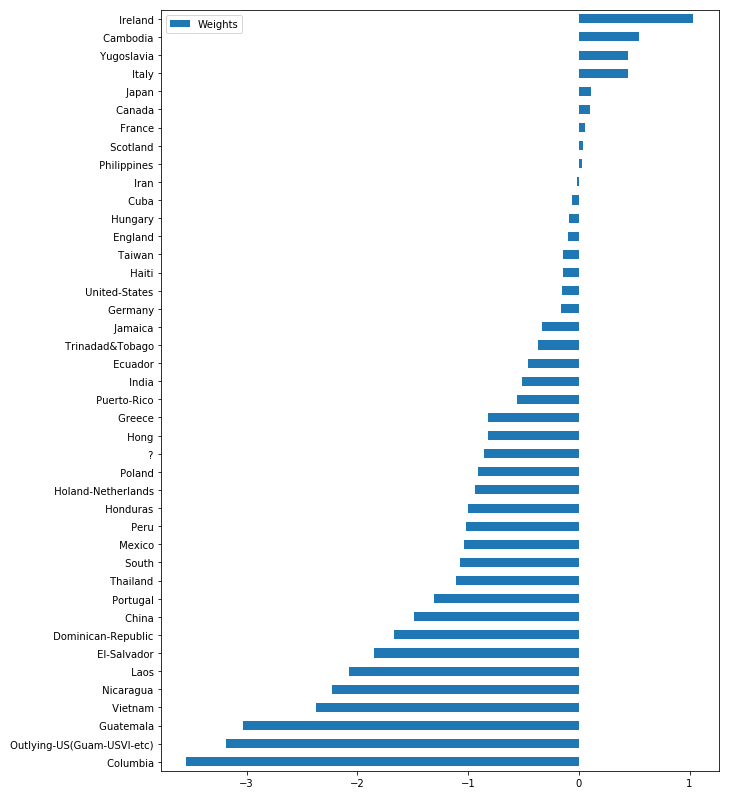

In [54]:
for cat_feat in cat_feat_dict.keys():
    weights = tf_LinearClassifier_model.get_variable_value('linear/linear_model/%s/weights' %(cat_feat)).flatten()
    keys = cat_feat_dict [cat_feat]
    height = len(keys)/3.
    pd.DataFrame({"Weights":weights},index=keys).sort_values("Weights",ascending=True).plot(kind="barh", figsize=(10,height)) 

In [61]:
features = []
weights = []

for num_feat in num_cols_list:
    features.append(num_feat)
    weight = tf_LinearClassifier_model.get_variable_value('linear/linear_model/%s/weights' %(num_feat)).flatten()[0]
    weights.append(weight)
    
num_feature_importance = pd.DataFrame({'features': features, 'weights': weights}).sort_values("weights",ascending=False)

In [62]:
num_feature_importance

,features,weights
4,hours_per_week,0.029860
0,age,0.026347
2,capital_gain,0.000517
3,capital_loss,-0.000799
1,education_num,-0.052922


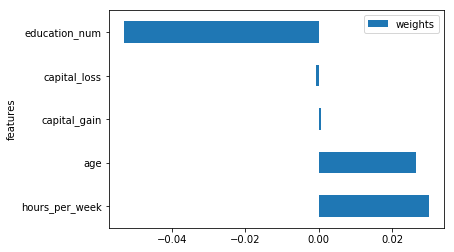

In [63]:
num_feature_importance.plot(kind='barh', x='features')